<a href="https://colab.research.google.com/github/fher2819/Proyecto-IA---Breast-Cancer-Detection/blob/main/Clasificaci%C3%B3n_C%C3%A1ncer_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerías a importar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar los datos

data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
print(data.columns)
print(f'La variable objetivo (target) es {data.columns[1]}.')
print(f'El target {data.columns[1]} posee dos clases: M (maligno) y B (benigno).')

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
La variable objetivo (target) es diagnosis.
El target diagnosis posee dos clases: M (maligno) y B (benigno).


In [ ]:
#Limpieza de los datos

data.drop("Unnamed: 32", axis = 1, inplace = True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.shape

(569, 32)

In [ ]:
data.drop("id", axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.shape

(569, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#manejo de los datos nulos

data.isnull() .sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#conversión del tipo de información de la variable objetivo (target)

data["diagnosis"].replace(to_replace = "M", value = 1, inplace = True)
data["diagnosis"].replace(to_replace = "B", value = 0, inplace = True)

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#análisis de valores duplicados

data[data.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [ ]:
#análisis del desbalanceo de los datos del target

data_imb = pd.DataFrame(data["diagnosis"].value_counts())
data_imb.reset_index(inplace = True)
data_imb

,index,diagnosis
0,0,357
1,1,212


In [ ]:
percentage = []
for i in data_imb["diagnosis"].values:
    a = i/data_imb["diagnosis"].sum()
    percentage.append(a)

percentage = pd.DataFrame(percentage).reset_index()
percentage = percentage.rename(columns = {0:"Percentage"})

data_imb = pd.merge(data_imb, percentage, on = "index")
data_imb = pd.DataFrame(data_imb)
data_imb

,index,diagnosis,Percentage
0,0,357,0.627417
1,1,212,0.372583


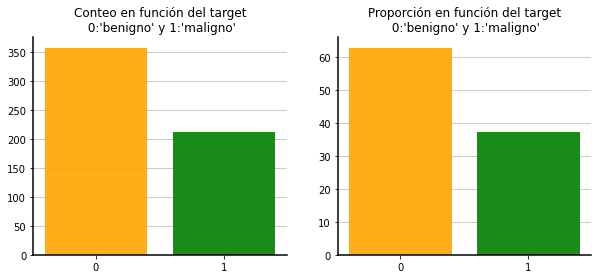

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,4))

x = [str(data_imb["index"][0]), str(data_imb["index"][1])]
y = data_imb["diagnosis"]
y_prop = round(data_imb["Percentage"],4)*100

axs[0].bar(x, y, color = ["orange", "green"], alpha = 0.9)
axs[0].set_title("Conteo en función del target\n 0:'benigno' y 1:'maligno'")

axs[1].bar(x, y_prop, color = ["orange", "green"], alpha = 0.9)
axs[1].set_title("Proporción en función del target\n 0:'benigno' y 1:'maligno'")
for i in list(range(0,2)):
    for j in ['bottom', 'left']:
        axs[i].spines[j].set_color('black')
        axs[i].spines[j].set_linewidth(1.5) 
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].set_axisbelow(True)
    axs[i].grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

In [ ]:
processed_data = data.copy()
processed_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#balanceo de los datos

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state = 7)
X = processed_data.drop("diagnosis", axis = 1)
y = processed_data["diagnosis"]

In [ ]:
from imblearn import under_sampling
X_over, y_over = undersample.fit_resample(X, y)

In [ ]:
print(X_over.shape)
print(y_over.shape)

(424, 30)
(424,)


In [ ]:
y_over = pd.DataFrame(y_over.value_counts())
y_over = y_over.reset_index()
y_over

,index,diagnosis
0,0,212
1,1,212


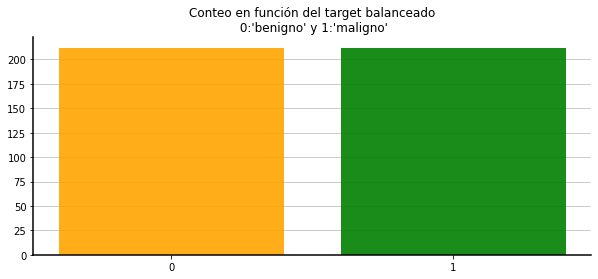

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

x = [str(y_over["index"][0]), str(y_over["index"][1])]
y = y_over["diagnosis"]

ax.bar(x, y, color = ["orange", "green"], alpha = 0.9)
plt.title("Conteo en función del target balanceado\n 0:'benigno' y 1:'maligno'")

for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)

plt.show()

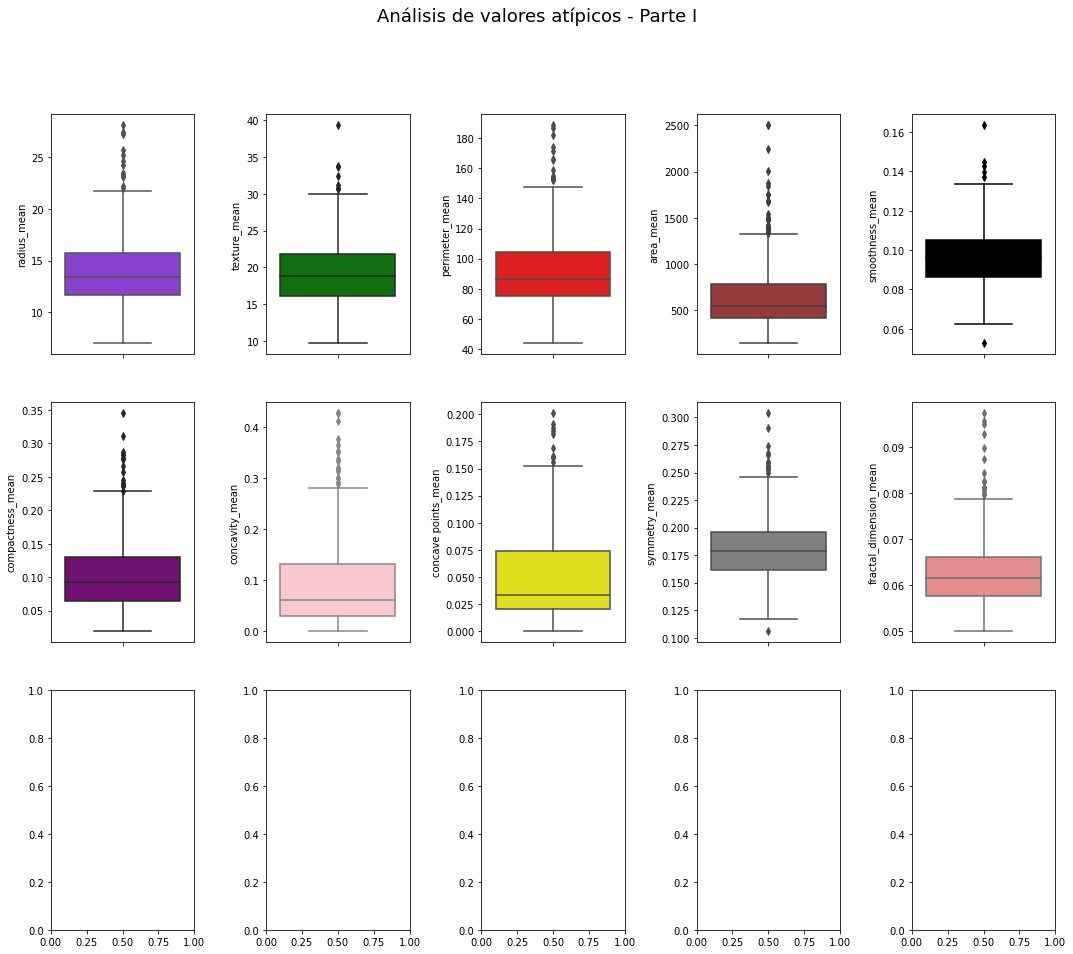

In [ ]:
#análisis exploratorio de los datos

fig, axs = plt.subplots(3, 5, figsize = (18,15))
plt.suptitle("Análisis de valores atípicos - Parte I", size = 18)
sns.boxplot(y=data["radius_mean"], orient = "v", ax = axs[0,0], color = "blueviolet")
sns.boxplot(y=data["texture_mean"], orient = "v", ax = axs[0,1], color = "green")
sns.boxplot(y=data["perimeter_mean"], orient = "v", ax = axs[0,2], color = "red")
sns.boxplot(y=data["area_mean"], orient = "v", ax = axs[0,3], color = "brown")
sns.boxplot(y=data["smoothness_mean"], orient = "v", ax = axs[0,4], color = "black")
sns.boxplot(y=data["compactness_mean"], orient = "v", ax = axs[1,0], color = "purple")
sns.boxplot(y=data["concavity_mean"], orient = "v", ax = axs[1,1], color = "pink")
sns.boxplot(y=data["concave points_mean"], orient = "v", ax = axs[1,2], color = "yellow")
sns.boxplot(y=data["symmetry_mean"], orient = "v", ax = axs[1,3], color = "gray")
sns.boxplot(y=data["fractal_dimension_mean"], orient = "v", ax = axs[1,4], color = "lightcoral")
fig.subplots_adjust(wspace=0.5)
plt.show()

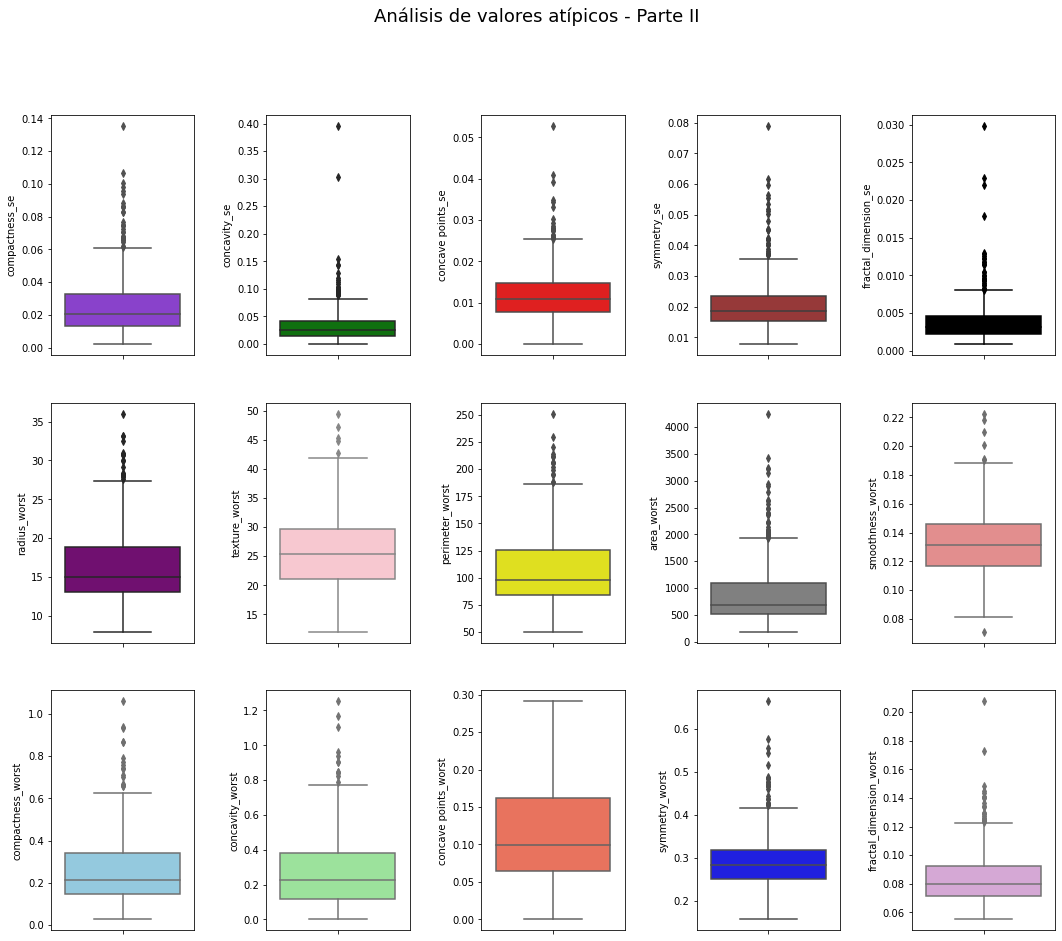

In [ ]:
fig, axs = plt.subplots(3, 5, figsize = (18,15))
plt.suptitle("Análisis de valores atípicos - Parte II", size = 18)
sns.boxplot(y=data["compactness_se"], orient = "v", ax = axs[0,0], color = "blueviolet")
sns.boxplot(y=data["concavity_se"], orient = "v", ax = axs[0,1], color = "green")
sns.boxplot(y=data["concave points_se"], orient = "v", ax = axs[0,2], color = "red")
sns.boxplot(y=data["symmetry_se"], orient = "v", ax = axs[0,3], color = "brown")
sns.boxplot(y=data["fractal_dimension_se"], orient = "v", ax = axs[0,4], color = "black")
sns.boxplot(y=data["radius_worst"], orient = "v", ax = axs[1,0], color = "purple")
sns.boxplot(y=data["texture_worst"], orient = "v", ax = axs[1,1], color = "pink")
sns.boxplot(y=data["perimeter_worst"], orient = "v", ax = axs[1,2], color = "yellow")
sns.boxplot(y=data["area_worst"], orient = "v", ax = axs[1,3], color = "gray")
sns.boxplot(y=data["smoothness_worst"], orient = "v", ax = axs[1,4], color = "lightcoral")
sns.boxplot(y=data["compactness_worst"], orient = "v", ax = axs[2,0], color = "skyblue")
sns.boxplot(y=data["concavity_worst"], orient = "v", ax = axs[2,1], color = "lightgreen")
sns.boxplot(y=data["concave points_worst"], orient = "v", ax = axs[2,2], color = "tomato")
sns.boxplot(y=data["symmetry_worst"], orient = "v", ax = axs[2,3], color = "blue")
sns.boxplot(y=data["fractal_dimension_worst"], orient = "v", ax = axs[2,4], color = "plum")
fig.subplots_adjust(wspace=0.5)
plt.show()

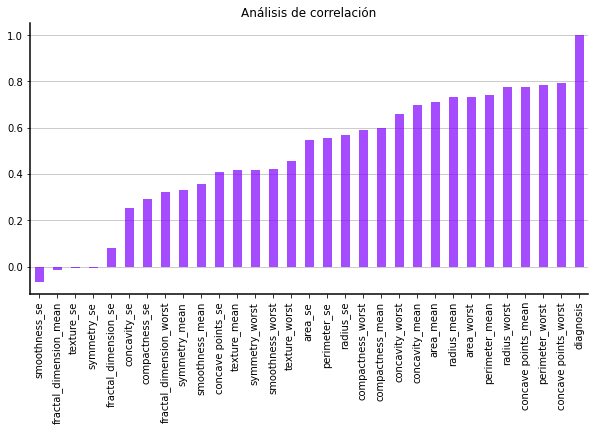

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
processed_data.corr()["diagnosis"].sort_values(ascending = True).plot(kind = "bar", 
                    cmap = "rainbow", alpha = 0.7)
plt.title("Análisis de correlación")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

In [ ]:
#En este caso, se eliminarán 3 columnas porque presentan un coeficiente de correlación alrededor de 0, 
#lo que significa que tales features no se encuentran relacionadas con el target. 
#Las tres columnas son: fractal_dimension_mean, texture_se y symmetry_se.

remove_columns = ["fractal_dimension_mean", "texture_se", "symmetry_se"]
data.drop(remove_columns, axis = 1, inplace = True)
data.shape

(569, 28)

Estimación de la densidad del núcleo conjunto entre las variables más correlacionadas con el target.


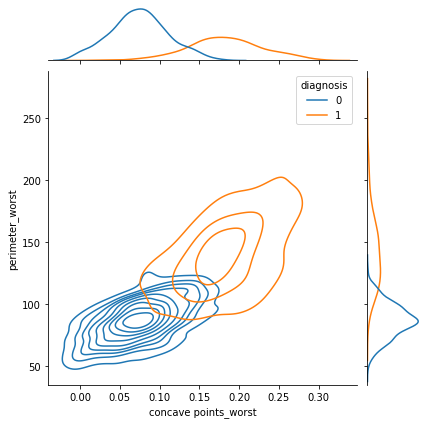

In [ ]:
print("Estimación de la densidad del núcleo conjunto entre las variables más correlacionadas con el target.")
sns.jointplot(
    data= data,
    x="concave points_worst",
    y="perimeter_worst",
    hue="diagnosis",
    kind="kde"
)
plt.show()

In [ ]:
#escalamiento de los datos

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
processed_scaled_data = scaler.fit_transform(processed_data)
processed_scaled_data = pd.DataFrame(processed_scaled_data)
processed_scaled_data.columns = processed_data.columns
processed_scaled_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


Entrenamiento del modelo de regresión binomial

In [ ]:
#Modelo LogisticRegression()

X = processed_scaled_data.drop("diagnosis", axis = 1)
y = processed_scaled_data["diagnosis"].values

In [ ]:
# Optaré por partir la información en 80% destinado a entrenamiento y 20% para test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7,
                                shuffle = True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

prediction_test = model.predict(X_test)

print(f'Recall Score : {recall_score(y_test, prediction_test)}')
print(f'Accuracy Score : {accuracy_score(y_test, prediction_test)}')
print(f'Precision Score : {precision_score(y_test, prediction_test)}')

Recall Score : 0.875
Accuracy Score : 0.956140350877193
Precision Score : 1.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test, target_names = ["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.94      1.00      0.97        74
   malignant       1.00      0.88      0.93        40

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



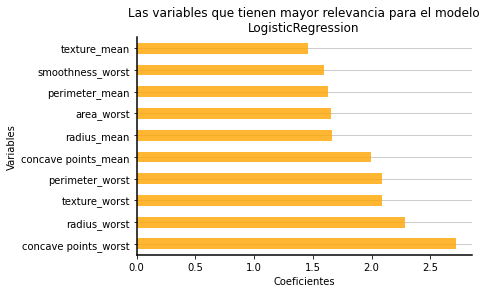

In [ ]:
# ¿Cuáles son las variables más importantes para este modelo?
fig, ax = plt.subplots()
weights_lg = pd.Series(model.coef_[0],
                    index=X.columns.values)
weights_lg.sort_values(ascending=False)[:10].plot(kind="barh", color = "orange", alpha = 0.8)
plt.title("Las variables que tienen mayor relevancia para el modelo\nLogisticRegression")
plt.xlabel("Coeficientes")
plt.ylabel("Variables")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

<Figure size 432x288 with 0 Axes>

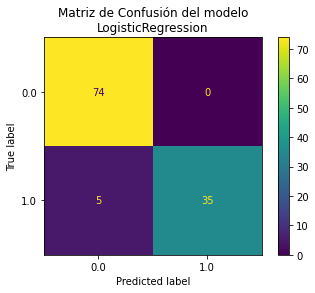

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig = plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="viridis")
plt.title("Matriz de Confusión del modelo\nLogisticRegression")
fig.show()

Max. depth: 1.000, train: 0.923, test: 0.912
Max. depth: 2.000, train: 0.963, test: 0.921
Max. depth: 3.000, train: 0.971, test: 0.912
Max. depth: 4.000, train: 0.987, test: 0.930
Max. depth: 5.000, train: 0.989, test: 0.930
Max. depth: 6.000, train: 0.998, test: 0.904
Max. depth: 7.000, train: 1.000, test: 0.904
Max. depth: 8.000, train: 1.000, test: 0.939
Max. depth: 9.000, train: 1.000, test: 0.947
Max. depth: 10.000, train: 1.000, test: 0.939
Max. depth: 11.000, train: 1.000, test: 0.930
Max. depth: 12.000, train: 1.000, test: 0.930
Max. depth: 13.000, train: 1.000, test: 0.939
Max. depth: 14.000, train: 1.000, test: 0.904
Max. depth: 15.000, train: 1.000, test: 0.930
Max. depth: 16.000, train: 1.000, test: 0.930
Max. depth: 17.000, train: 1.000, test: 0.921
Max. depth: 18.000, train: 1.000, test: 0.904
Max. depth: 19.000, train: 1.000, test: 0.939
Max. depth: 20.000, train: 1.000, test: 0.939
Max. depth: 21.000, train: 1.000, test: 0.930
Max. depth: 22.000, train: 1.000, test: 0.9

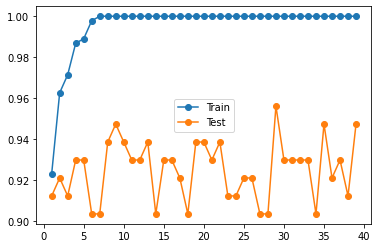

In [ ]:
# Modelo DecisionTreeClassifier()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()
max_depths = [i for i in range(1,40)]
for i in max_depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc = dtc.fit(X_train, y_train)
    train_yhat = dtc.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = dtc.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('Max. depth: %.3f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(max_depths, train_scores, '-o', label='Train')
plt.plot(max_depths, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 40)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

prediction_test_dtc = dtc.predict(X_test)
print(f'Recall Score : {recall_score(y_test, prediction_test_dtc)}')
print(f'Accuracy Socre : {accuracy_score(y_test, prediction_test_dtc)}')
print(f'Precision Score : {precision_score(y_test, prediction_test_dtc)}')

Recall Score : 0.825
Accuracy Socre : 0.9122807017543859
Precision Score : 0.9166666666666666


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test_dtc, target_names = ["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.91      0.96      0.93        74
   malignant       0.92      0.82      0.87        40

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



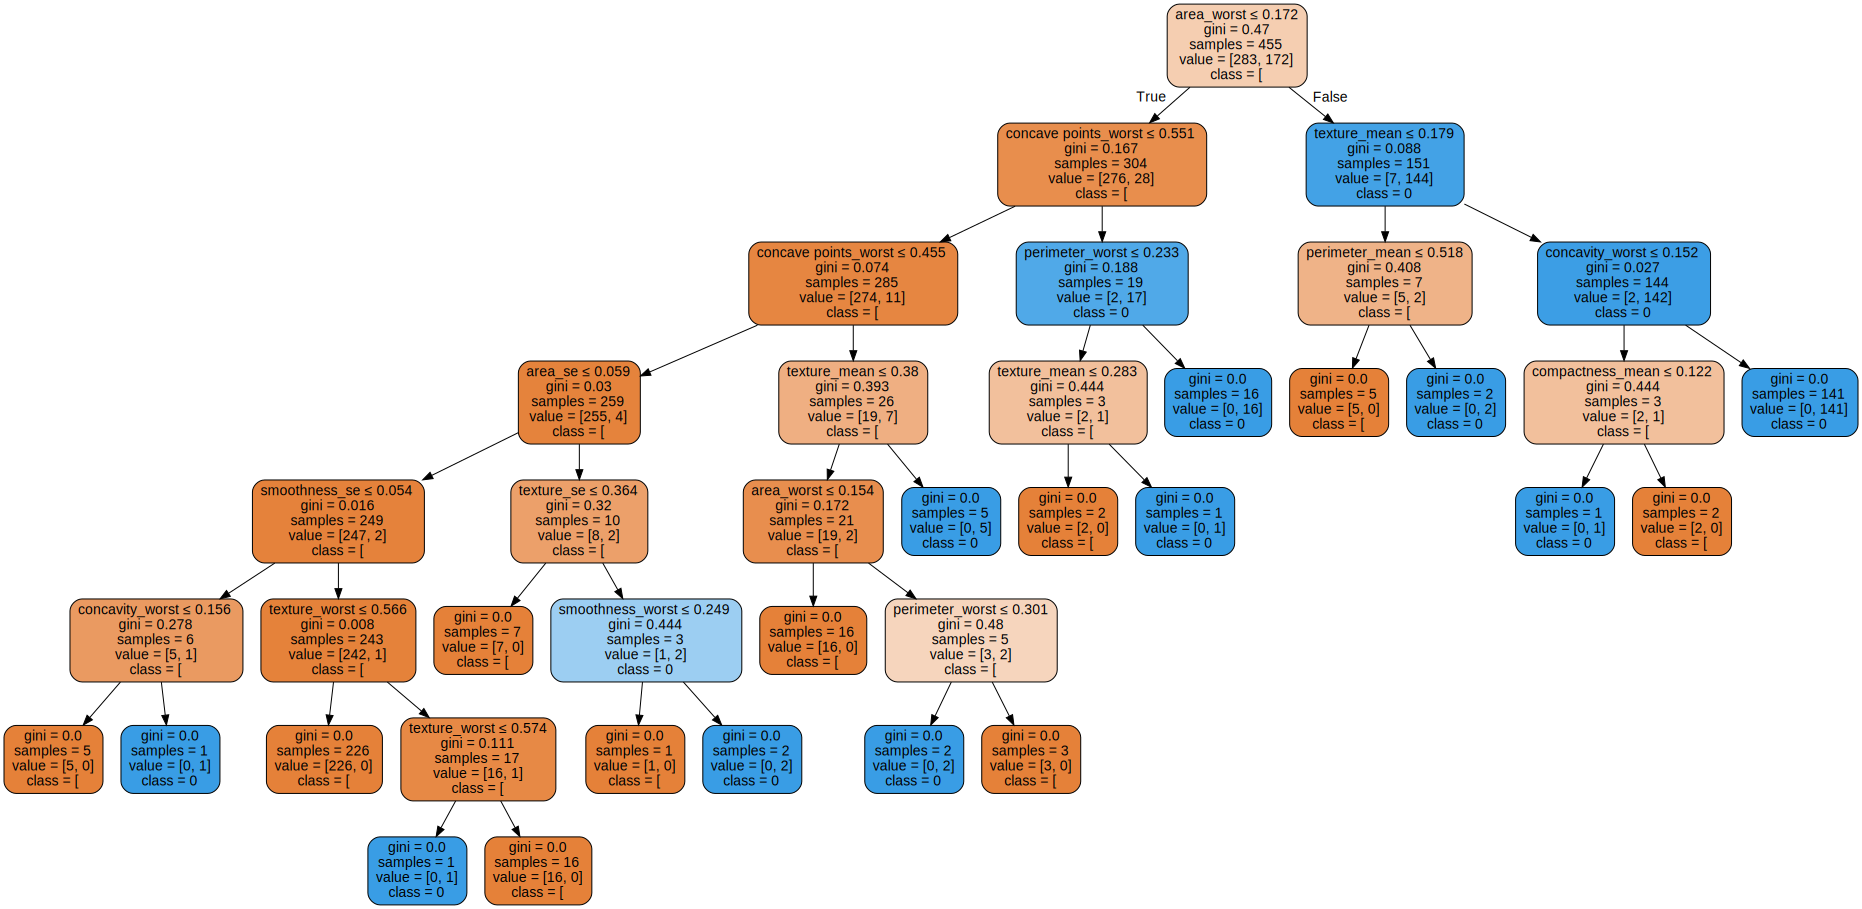

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None,
    feature_names=X.columns,  
    class_names=str([0,1]),  
    filled=True, rounded=True,  
    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
# Modelo K Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=10) #Construyendo el modelo
knn.fit(X_train,y_train) #Entrenando el modelo
print("Print accuracy of K Neighbors Classifier algo: {}".format(knn.score(X_test,y_test)))
knn_acc_score = knn.score(X_test,y_test)

Print accuracy of K Neighbors Classifier algo: 0.956140350877193


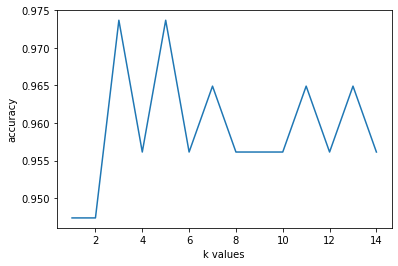

In [ ]:
# Creando un bucle for para encontrar el mejor valor de k

score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
#visualize
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.savefig('plot')
plt.show()

In [ ]:
# El mejor valor de k según la grafica es 3 y 5, probamos de nuevo

knn = KNeighborsClassifier(n_neighbors=5) #We build our model
knn.fit(X_train,y_train) #We train our model
print("Test accuracy {}".format(knn.score(X_test,y_test)))

Test accuracy 0.9736842105263158


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3) #We build our model
knn.fit(X_train,y_train) #We train our model
print("Test accuracy {}".format(knn.score(X_test,y_test)))

Test accuracy 0.9736842105263158


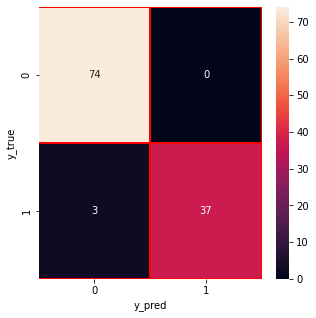

In [ ]:
y_pred = knn.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
# Modelo Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()       #We are building our model
nb.fit(X_train,y_train) #We are training our model
print("Print accuracy of naive bayes algo: {}".format(nb.score(X_test,y_test)))
nb_acc_score = nb.score(X_test,y_test)

Print accuracy of naive bayes algo: 0.9473684210526315


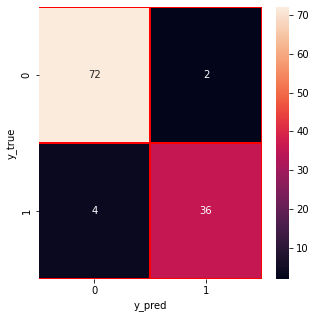

In [ ]:
# Nuestro modelo tiene una exactitud de 0.94, usamos la matriz de confusión para ver las partes equivocadas en la matriz

y_pred = nb.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
#Modelo SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC()   #We are building our model
svm.fit(X_train,y_train)      #We are training our model
print("Print accuracy of svm algo: ",svm.score(X_test,y_test))
svm_acc_score = svm.score(X_test,y_test)

Print accuracy of svm algo:  0.9824561403508771


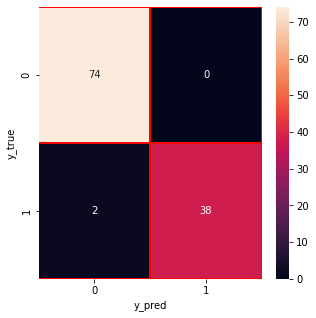

In [ ]:
y_pred = svm.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
# Modelo Randow Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(X_train,y_train)
print("Print accuracy of Random Forest Classifier algo: ",rf.score(X_test,y_test))
rf_acc_score = rf.score(X_test,y_test)

Print accuracy of Random Forest Classifier algo:  0.9649122807017544


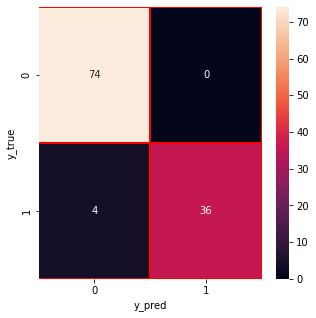

In [ ]:
y_pred = rf.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
# Evaluación de los modelos

dtc_acc_score = dtc.score(X_test,y_test)
lr_acc_score = model.score(X_test,y_test)

knn = KNeighborsClassifier(n_neighbors=5) #We build our model
knn.fit(X_train,y_train) #We train our model
knn_acc_score = knn.score(X_test,y_test)

model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Naive Bayes','Support Vector Machine','Decision Tree','Random Forest'], 
                         'Accuracy': [lr_acc_score*100,knn_acc_score*100,nb_acc_score*100,svm_acc_score*100,dtc_acc_score*100,rf_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,95.614035
1,K-Nearest Neighbour,97.368421
2,Naive Bayes,94.736842
3,Support Vector Machine,98.245614
4,Decision Tree,91.228070
5,Random Forest,96.491228


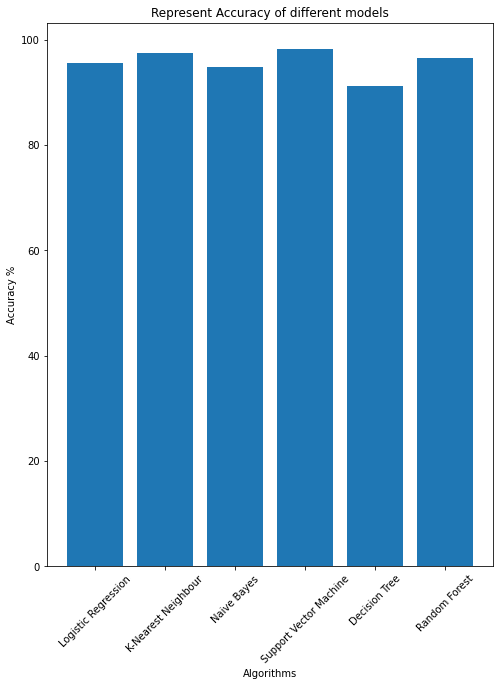

In [ ]:
#Visualize
plt.figure(figsize=(8,10))
plt.title("Represent Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=45)
plt.bar(model_ev['Model'],model_ev['Accuracy'])
plt.show()